In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import decimal
from datetime import datetime, timedelta
from dateutil import parser
from plotting import CandlePlot
import plotly.graph_objects as go
from technical.patterns import is_bearish_pattern, is_bullish_pattern
from technical.peaks import get_peaks, PeakType, plot_peaks, get_peak
from collections import namedtuple
from typing import List
from simulator.simulator import Simulator
from simulator.trade import TradeOutcome
from strategies.supply_demand_strategy import SupplyDemandStrategy
from strategies.swing_strategy import SwingStrategy
import pickle
import pathlib

/tmp/ipykernel_76942/327068495.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# start = parser.parse('2023-01-02T00:00:00Z')
# end = parser.parse('2024-01-02T22:00:00Z')
start = parser.parse('2022-01-04T00:00:00Z')
end = parser.parse('2023-01-04T22:00:00Z')
# start = parser.parse('2021-01-05T00:00:00Z')
# end = parser.parse('2022-01-04T22:00:00Z')

In [4]:
# GBP_USD 
df_h1 = pd.read_pickle(f"../data/candles/GBP_USD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/GBP_USD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)

strategy = SupplyDemandStrategy()
simulator_gbp_usd = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_gbp_usd, closed_trades_gbp_usd = simulator_gbp_usd.run()

Open Trades len: 0
Closed Trades len: 8
5 (62.50%) wrong trades taken out of: 8 trades in total


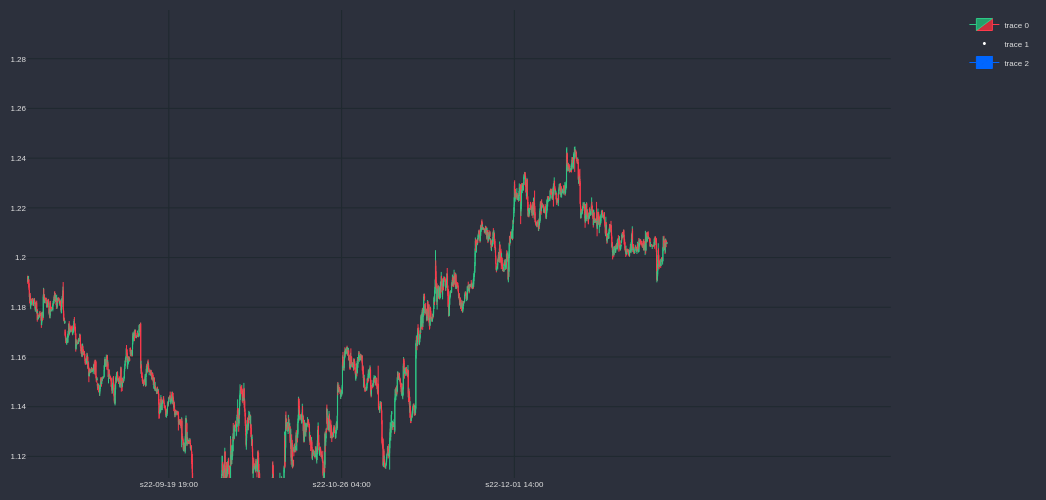

In [17]:
simulator_gbp_usd.plot_trades([t for t in closed_trades_gbp_usd if t.outcome == TradeOutcome.LOSS], lambda data : fr"peaks: {[p.idx for p in data['peaks']]}")

In [5]:
# USD_CAD
df_h1 = pd.read_pickle(f"../data/candles/USD_CAD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/USD_CAD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)

strategy = SupplyDemandStrategy()
simulator_usd_cad = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_usd_cad, closed_trades_usd_cad = simulator_usd_cad.run()

Open Trades len: 0
Closed Trades len: 9
5 (55.56%) wrong trades taken out of: 9 trades in total


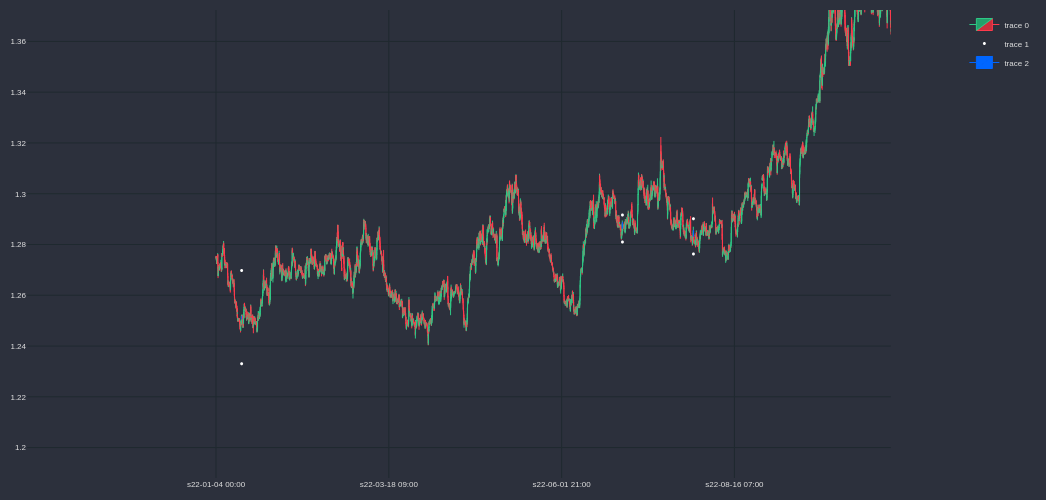

In [18]:
simulator_usd_cad.plot_trades([t for t in closed_trades_usd_cad if t.outcome == TradeOutcome.LOSS], lambda data : fr"peaks: {[p.idx for p in data['peaks']]}")

In [6]:
# AUD_USD
df_h1 = pd.read_pickle(f"../data/candles/AUD_USD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/AUD_USD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)

strategy = SupplyDemandStrategy()
simulator_aud_usd = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_aud_usd, closed_trades_aud_usd = simulator_aud_usd.run()

/home/omar/workspace/forex/exploration/../technical/patterns.py:77: RuntimeWarning: invalid value encountered in scalar divide
  head_perc = (row['mid_h'] - min_body_price) / full_height * 100
/home/omar/workspace/forex/exploration/../technical/patterns.py:78: RuntimeWarning: invalid value encountered in scalar divide
  high_to_head_perc = (row['mid_h'] - max_body_price) / full_height * 100
/home/omar/workspace/forex/exploration/../technical/patterns.py:77: RuntimeWarning: invalid value encountered in scalar divide
  head_perc = (row['mid_h'] - min_body_price) / full_height * 100
/home/omar/workspace/forex/exploration/../technical/patterns.py:78: RuntimeWarning: invalid value encountered in scalar divide
  high_to_head_perc = (row['mid_h'] - max_body_price) / full_height * 100


Open Trades len: 0
Closed Trades len: 11
5 (45.45%) wrong trades taken out of: 11 trades in total


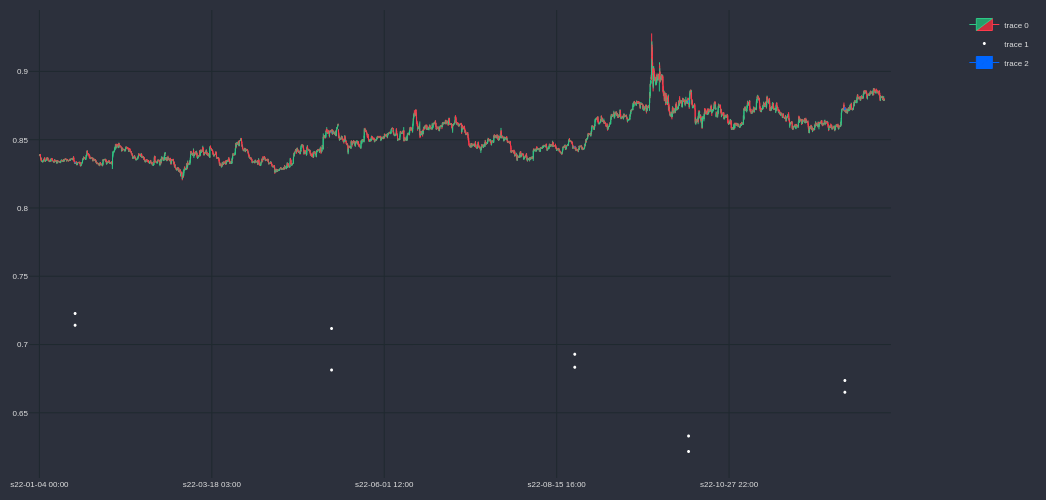

In [21]:
simulator_aud_usd.plot_trades([t for t in closed_trades_aud_usd if t.outcome == TradeOutcome.LOSS], lambda data : fr"peaks: {[p.idx for p in data['peaks']]}")

In [8]:
# NZD_USD
df_h1 = pd.read_pickle(f"../data/candles/NZD_USD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/NZD_USD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)

strategy = SupplyDemandStrategy()
simulator_nzd_usd = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_nzd_usd, closed_trades_nzd_usd = simulator_nzd_usd.run()

/home/omar/workspace/forex/exploration/../technical/patterns.py:77: RuntimeWarning: invalid value encountered in scalar divide
  head_perc = (row['mid_h'] - min_body_price) / full_height * 100
/home/omar/workspace/forex/exploration/../technical/patterns.py:78: RuntimeWarning: invalid value encountered in scalar divide
  high_to_head_perc = (row['mid_h'] - max_body_price) / full_height * 100
/home/omar/workspace/forex/exploration/../technical/patterns.py:77: RuntimeWarning: invalid value encountered in scalar divide
  head_perc = (row['mid_h'] - min_body_price) / full_height * 100
/home/omar/workspace/forex/exploration/../technical/patterns.py:78: RuntimeWarning: invalid value encountered in scalar divide
  high_to_head_perc = (row['mid_h'] - max_body_price) / full_height * 100



        **************
        Breaking row: 4473
        bid_h: 0.59101
        bid_l: 0.58411
        ask_h: 0.59121
        ask_l: 0.58433
        take profit: 0.58643
        stop_loss: 0.59097
        **************
        
Open Trades len: 0
Closed Trades len: 17
10 (58.82%) wrong trades taken out of: 17 trades in total


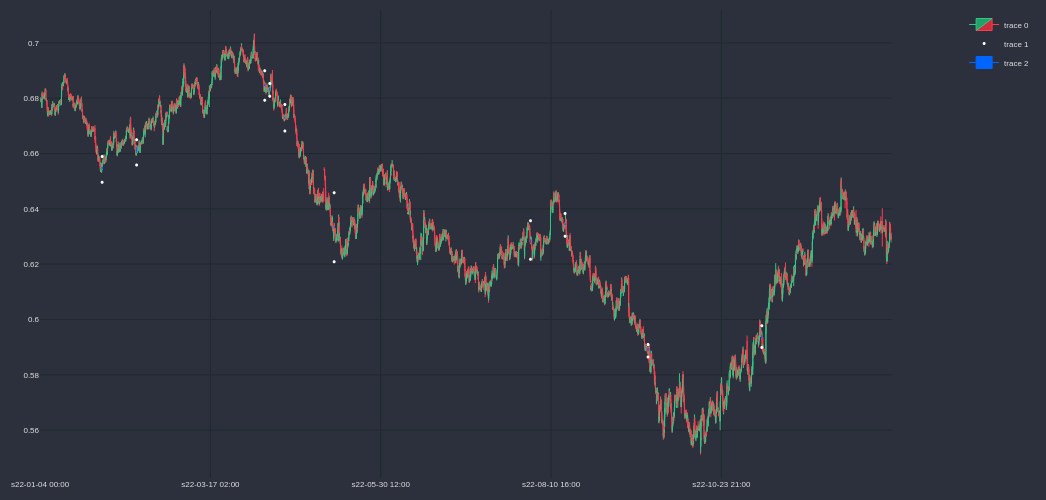

In [22]:
simulator_nzd_usd.plot_trades([t for t in closed_trades_nzd_usd if t.outcome == TradeOutcome.LOSS], lambda data : fr"peaks: {[p.idx for p in data['peaks']]}")

In [10]:
# EUR_CAD
df_h1 = pd.read_pickle(f"../data/candles/EUR_CAD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/EUR_CAD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)

strategy = SupplyDemandStrategy()
simulator_eur_cad = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_eur_cad, closed_trades_eur_cad = simulator_eur_cad.run()

Open Trades len: 0
Closed Trades len: 12
4 (33.33%) wrong trades taken out of: 12 trades in total


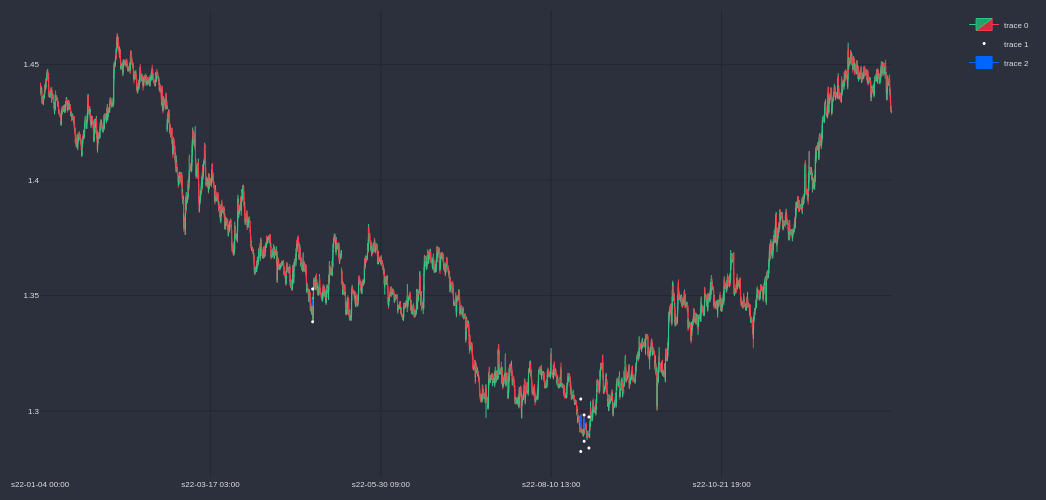

In [23]:
simulator_eur_cad.plot_trades([t for t in closed_trades_eur_cad if t.outcome == TradeOutcome.LOSS], lambda data : fr"peaks: {[p.idx for p in data['peaks']]}")

In [13]:
# EUR_GBP
df_h1 = pd.read_pickle(f"../data/candles/EUR_GBP_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/EUR_GBP_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)

strategy = SupplyDemandStrategy()
simulator_eur_gbp = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_eur_gbp, closed_trades_eur_gbp = simulator_eur_gbp.run()

/home/omar/workspace/forex/exploration/../technical/patterns.py:77: RuntimeWarning: invalid value encountered in scalar divide
  head_perc = (row['mid_h'] - min_body_price) / full_height * 100
/home/omar/workspace/forex/exploration/../technical/patterns.py:78: RuntimeWarning: invalid value encountered in scalar divide
  high_to_head_perc = (row['mid_h'] - max_body_price) / full_height * 100


Open Trades len: 0
Closed Trades len: 10
7 (70.00%) wrong trades taken out of: 10 trades in total


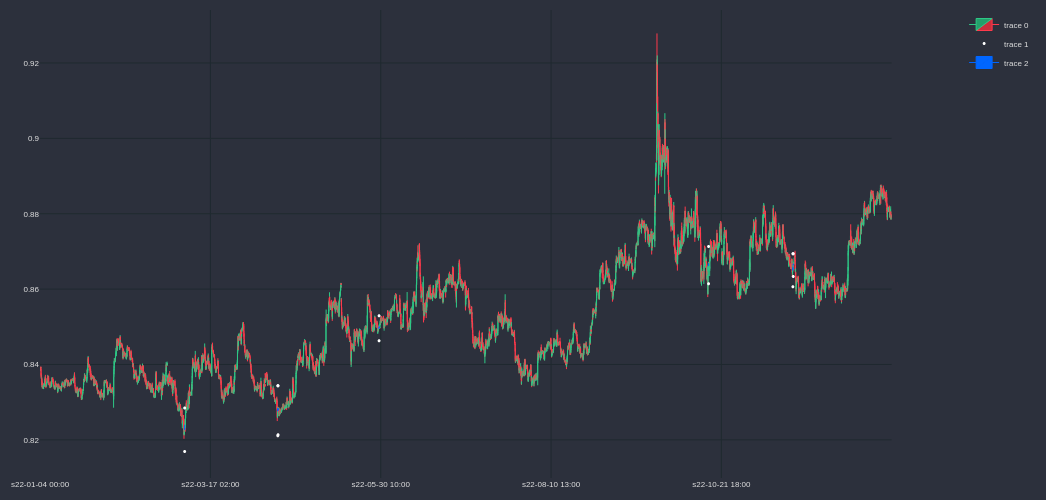

In [24]:
simulator_eur_gbp.plot_trades([t for t in closed_trades_eur_gbp if t.outcome == TradeOutcome.LOSS], lambda data : fr"peaks: {[p.idx for p in data['peaks']]}")

In [14]:
# EUR_USD
df_h1 = pd.read_pickle(f"../data/candles/EUR_USD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/EUR_USD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)


strategy = SupplyDemandStrategy()
simulator_eur_usd = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_eur_usd, closed_trades_eur_usd = simulator_eur_usd.run()

KeyboardInterrupt: 

In [ ]:
# GBP_CAD
df_h1 = pd.read_pickle(f"../data/candles/GBP_CAD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/GBP_CAD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)


strategy = SupplyDemandStrategy()
simulator_aud_usd = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_gbp_cad, closed_trades_gbp_cad = simulator_gbp_cad.run()

In [ ]:
# AUD_CAD
df_h1 = pd.read_pickle(f"../data/candles/AUD_CAD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/AUD_CAD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)


strategy = SupplyDemandStrategy()
simulator_aud_usd = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_aud_cad, closed_trades_aud_cad = simulator_aud_cad.run()

In [ ]:
# EUR_AUD
df_h1 = pd.read_pickle(f"../data/candles/EUR_AUD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/EUR_AUD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)


strategy = SupplyDemandStrategy()
simulator_aud_usd = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_eur_aud, closed_trades_eur_aud = simulator_eur_aud.run()

In [ ]:
# EUR_NZD
df_h1 = pd.read_pickle(f"../data/candles/EUR_NZD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/EUR_NZD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)


strategy = SupplyDemandStrategy()
simulator_aud_usd = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_eur_nzd, closed_trades_eur_nzd = simulator_eur_nzd.run()

In [ ]:
# GBP_AUD
df_h1 = pd.read_pickle(f"../data/candles/GBP_AUD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/GBP_AUD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)


strategy = SupplyDemandStrategy()
simulator_aud_usd = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_gbp_aud, closed_trades_gbp_aud = simulator_gbp_aud.run()

In [ ]:
# GBP_NZD
df_h1 = pd.read_pickle(f"../data/candles/GBP_NZD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/GBP_NZD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)


strategy = SupplyDemandStrategy()
simulator_aud_usd = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_gbp_nzd, closed_trades_gbp_nzd = simulator_gbp_nzd.run()

In [ ]:
# NZD_CAD
df_h1 = pd.read_pickle(f"../data/candles/NZD_CAD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/NZD_CAD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)


strategy = SupplyDemandStrategy()
simulator_aud_usd = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_nzd_cad, closed_trades_nzd_cad = simulator_nzd_cad.run()

In [ ]:
# AUD_NZD
df_h1 = pd.read_pickle(f"../data/candles/AUD_NZD_H1.pkl")
df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
                                                                          
df_m5 = pd.read_pickle(f"../data/candles/AUD_NZD_M5.pkl")
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)


strategy = SupplyDemandStrategy()
simulator_aud_usd = Simulator(strategy=strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)
open_trades_aud_nzd, closed_trades_aud_nzd = simulator_aud_nzd.run()